<a href="https://colab.research.google.com/github/harshk1234/zomato/blob/main/Copy_of_Copy_of_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Zomatodataset/zomato.csv',encoding='latin-1')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.info() #colums, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## in data analysis what we do
1 missing values
2 variables numerival
3 variables numerival
4 relationship between table

In [ ]:
df.isnull().sum() ##missing values cuisines 9


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0] ##we are using temp variable features  which atrate through colums and find out grater than 0

['Cuisines']

In [ ]:
import seaborn as sns



In [ ]:
df.shape

(9551, 21)

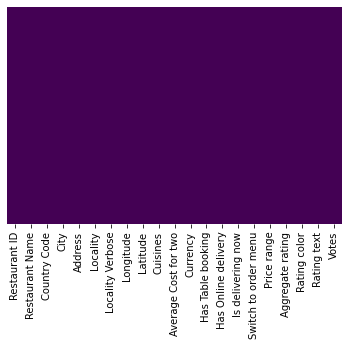

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') ##9551 rows so thats why not able to see 9 values

In [ ]:
df_country = pd.read_excel('/content/drive/MyDrive/data/Zomatodataset/Country-Code.xlsx') ##new file
df_country.head()


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
final_df=pd.merge(df,df_country,on='Country Code',how ='left') ##joint left last table country is added

In [ ]:
final_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [ ]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [ ]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
final_df.Country.value_counts()  ##max transcation in india i get

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [ ]:
final_df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [ ]:
final_df.Country.value_counts().values ##no of records respect to coutry

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [ ]:
coutry_names=final_df.Country.value_counts().index

In [ ]:
coutry_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7f2a7d13a150>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

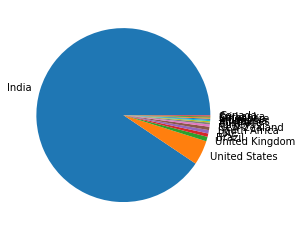

In [ ]:
plt.pie(coutry_val,labels=coutry_names)

([<matplotlib.patches.Wedge at 0x7f2a7d0b7950>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

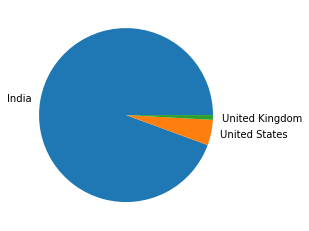

In [ ]:
plt.pie(coutry_val[:3],labels=coutry_names[:3]) ##top 3 uses

([<matplotlib.patches.Wedge at 0x7f2a7d08c550>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

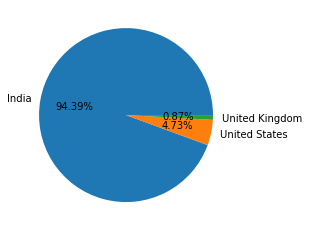

In [ ]:
plt.pie(coutry_val[:3],labels=coutry_names[:3],autopct='%1.2f%%') ##top 3 use percentage

observations
zomato max recors from india then us then uk

In [ ]:
##numerical variables
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()  ##

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [ ]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
rating=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [ ]:
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
## observations 
##rating is 4.5 to 4.9 is excelant
##rating is 4.0 to 4.4 is very good
##rating is 3.9 to 3.4 is very good so on
## 0 not giving rating ppl

In [ ]:
rating.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


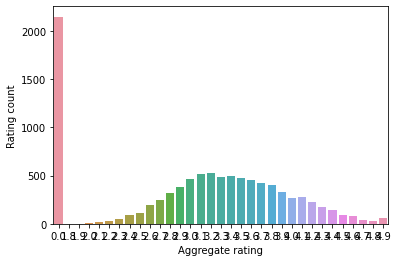

In [ ]:
sns.barplot(x='Aggregate rating' ,y='Rating count',data=rating)

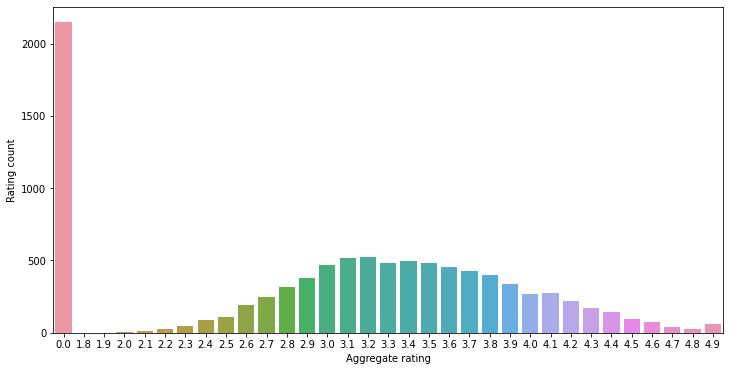

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating' ,y='Rating count',data=rating)

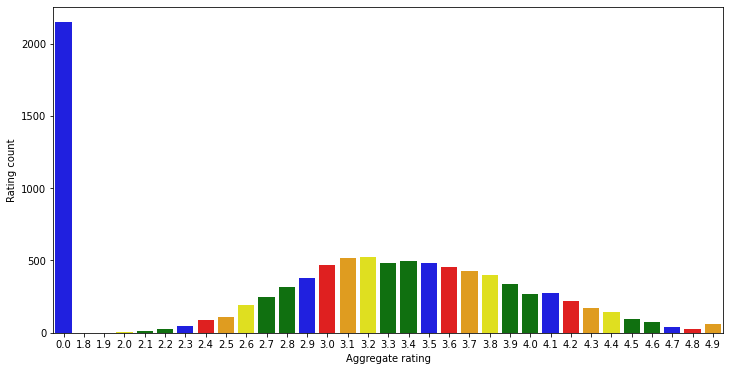

In [ ]:
sns.barplot(x='Aggregate rating' ,y='Rating count',data=rating,palette=['Blue','red','orange','yellow','green','green'])
## white is 0 rating

observations
1 not rated cout is vey high
2 max rating r beetween 2.5 to 3.4

In [ ]:
### Find the countries name that has given 0 rating 
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [ ]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()


,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
## Which Countries do have online deliveries option
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [ ]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()


,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


# India Restaurants EDA

In [ ]:
India_data =final_df[final_df.Country == 'India']
result = final_df['Country'].value_counts().reset_index()
India_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


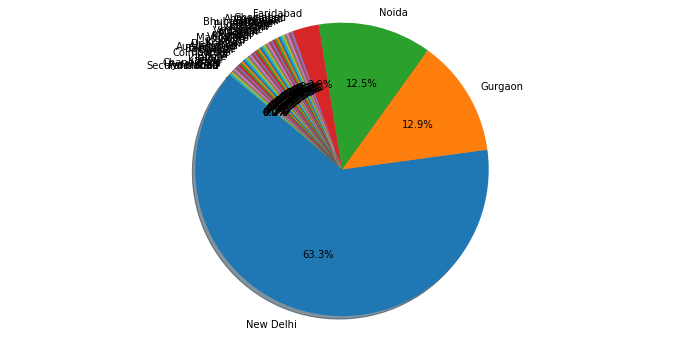

In [ ]:
Cities = India_data['City'].value_counts().reset_index()
Top_City = Cities.head(10)
plt.pie(Cities['City'],labels=Cities['index'],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
## Create a pie chart for top 5 cities distribution
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [ ]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7f2a7c977350>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

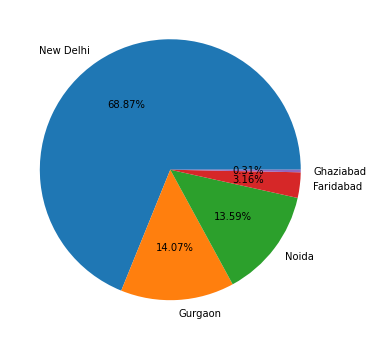

In [ ]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')


In [ ]:
NCR = India_data[(India_data['City']=='New Delhi') | (India_data['City']=='Gurgaon') | (India_data['City']=='Noida')]
NCR = NCR.drop(['Address','Locality','Locality Verbose','Country Code','Country'],axis=1)
NCR.head(5)

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1161,18396451,K Lab,Gurgaon,77.039310,28.424831,"Cafe, Beverages",350,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1162,18237941,Pind Balluchi,Gurgaon,77.039220,28.424913,"North Indian, Mughlai",800,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
1163,2787,Punjab Grill,Gurgaon,77.097118,28.503077,"North Indian, Mughlai",2000,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
1164,3431,Zambar,Gurgaon,77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
1165,303699,Cakes & More,Gurgaon,77.042009,28.511416,Bakery,250,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [ ]:
NCR.describe()


,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,7.671000e+03,7671.000000,7671.000000,7671.000000,7671.000000,7671.000000,7671.000000
mean,8.944743e+06,73.421889,27.194034,605.307000,1.652979,2.413140,108.719593
std,9.086295e+06,16.654240,6.157802,606.464314,0.820391,1.505473,327.906486
min,5.300000e+01,0.000000,0.000000,50.000000,1.000000,0.000000,0.000000
25%,3.005245e+05,77.104265,28.533939,300.000000,1.000000,0.000000,3.000000
50%,3.128090e+05,77.200704,28.578399,450.000000,1.000000,3.000000,20.000000
75%,1.836599e+07,77.260126,28.641052,700.000000,2.000000,3.500000,81.000000
max,1.850065e+07,77.529672,35.000000,8000.000000,4.000000,4.900000,7931.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


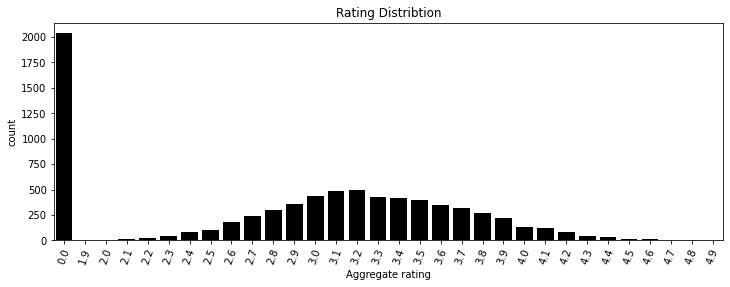

In [ ]:
rating = ['Aggregate rating	', 'Votes']

f, ax = plt.subplots(1,1, figsize = (12, 4))
sns.countplot(NCR['Aggregate rating'], ax = ax, color = 'k')
ax.tick_params('x', rotation = 70)
ax.set_title('Rating Distribtion')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


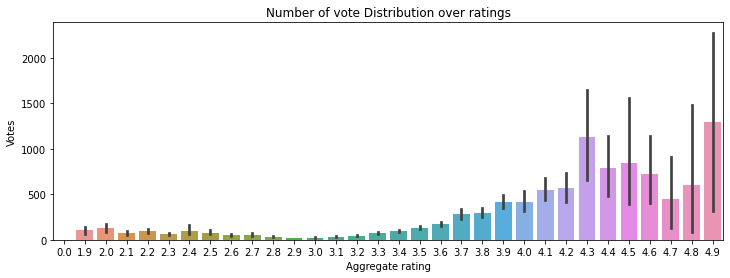

In [ ]:
f, ax = plt.subplots(1,1, figsize = (12, 4))
sns.barplot(NCR['Aggregate rating'],NCR['Votes'], ax=ax)
ax.set_title('Number of vote Distribution over ratings')
plt.show()

In [ ]:
print('ID # / Name #')
NCR[['Restaurant ID','Restaurant Name']].apply(pd.Series.nunique, axis = 0)

ID # / Name #


Restaurant ID      7671
Restaurant Name    5834
dtype: int64

In [ ]:
import folium  


In [ ]:
NCR_loc = India_data.loc[India_data['City']=='Gurgaon',['Latitude', 'Longitude']]
#NCR_loc = NCR[['Latitude', 'Longitude']]
NCR_loc = NCR_loc.loc[India_data['Latitude']!=0,['Latitude', 'Longitude']]
#Not counting for Restaurants without proper Geo Data
map_F = folium.Map( location=[28.201513, 76.989084],zoom_start = 10)
for i, (lat, lon) in enumerate(NCR_loc.values): folium.Marker([lat, lon]).add_to(map_F)
map_F

In [ ]:
NCR['rating_cat'] = NCR['Rating text'].map({'Not rated': -1, 'Poor':0, 'Average':2, 'Good':3, 'Very Good':4, 'Excellent':5})
NCR.rename(columns = {'Aggregate rating':'rating_num', 'Has Table booking': 'Book', 'Has Online delivery': 'On_deliver', 'Is delivering now':'Cur_deliver', 
                          'Switch to order menu' : 'Switch_menu', 'Average Cost for two' : 'Avg_cost_two', 'Price range' : 'Pr_range'}, inplace = True)
#NCR.drop(['Rating color', 'Rating text'], axis = 1 ,inplace= True)

NCR_test = NCR.loc[NCR.rating_cat == -1, :].copy()
NCR = NCR.loc[NCR.rating_cat != -1, :].copy()

NCR = NCR.loc[NCR['Longitude'] != 0, :]

In [ ]:
tmp = NCR['rating_num'].map(np.round)
a = np.full(tmp.shape[0], False, dtype = bool)
print('Round')
((tmp - NCR['rating_cat']).map(np.round)).value_counts()

Round


 1.0    4795
 0.0     539
 2.0     175
-1.0      16
dtype: int64

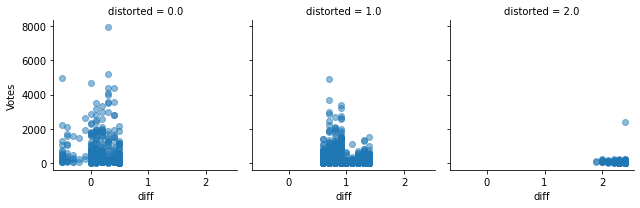

In [ ]:
sys_check = NCR[['rating_num', 'rating_cat', 'Votes']].copy()
sys_check['distorted'] = (NCR['rating_num'] - NCR['rating_cat']).map(np.round)
sys_check['diff'] = sys_check['rating_num'] - sys_check['rating_cat']
g = sns.FacetGrid(data =sys_check, col = 'distorted')
g = g.map(plt.scatter, 'diff', 'Votes', alpha = 0.5)
plt.show()

In [ ]:
NCR = NCR.loc[sys_check['distorted'] != 2, :]
NCR['rating_cat'] = NCR['rating_num'].round(0).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


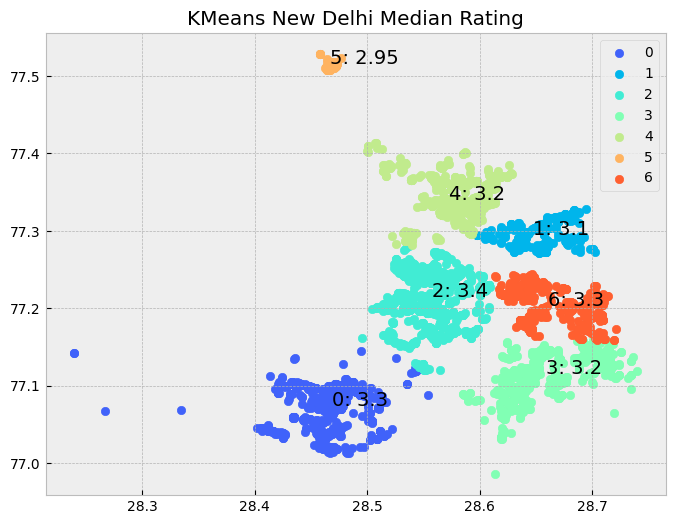

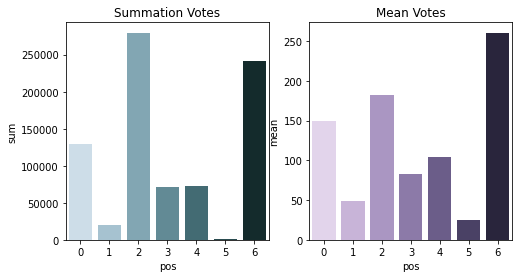

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(NCR[['Longitude', 'Latitude']])
NCR['pos'] = kmeans.labels_
pop_local = NCR.groupby('pos')['Longitude', 'Latitude', 'rating_num'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'rating_num':np.median}).reset_index()

with plt.style.context('bmh', after_reset=True):
    pal = sns.color_palette('rainbow', 7)
    plt.figure(figsize = (8,6))
    for i in range(7):
        ix = NCR.pos == i
        plt.scatter(NCR.loc[ix, 'Latitude'], NCR.loc[ix, 'Longitude'], color = pal[i], label = str(i))
        plt.text(pop_local.loc[i, 'Latitude'], pop_local.loc[i, 'Longitude'], str(i) + ': '+str(pop_local.loc[i, 'rating_num'].round(2)), fontsize = 14, color = 'black')
    plt.title('KMeans New Delhi Median Rating')
    plt.legend()
    plt.show()
    
votes_area = NCR.groupby('pos').agg({'Votes': [np.sum, np.mean]})
votes_area.columns = votes_area.columns.droplevel(0)
votes_area.reset_index(inplace = True)
plt.figure(figsize = (8,4))
ax = plt.subplot(1,2,1)
sns.barplot(x = 'pos', y = 'sum', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 2.4, rot = .1), ax = ax)
ax.set_title('Summation Votes')

ax = plt.subplot(1,2,2)
sns.barplot(x = 'pos', y = 'mean', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 3, rot = .1), ax = ax)
ax.set_title('Mean Votes')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


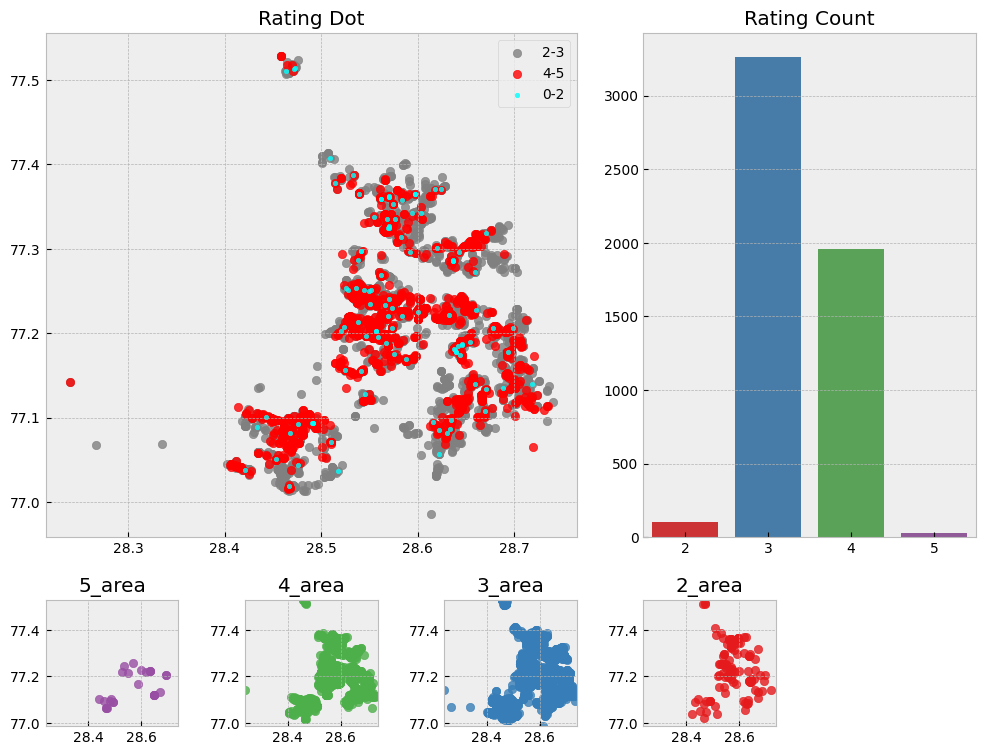

In [ ]:
with plt.style.context('bmh', after_reset=True):
    plt.figure(figsize = (12,9))

    cat = sorted(NCR['rating_cat'].unique())
    ax = plt.subplot2grid((4,5), (0,0), colspan = 3, rowspan = 3)
    pal = sns.color_palette('Set1', len(cat))
    ix0 = NCR.rating_cat.isin((0,2))
    ix2 = NCR.rating_cat.isin((2,3))
    ix4 = NCR.rating_cat.isin((4,5))
      

    ax.scatter(NCR.loc[ix2, 'Latitude'], NCR.loc[ix2, 'Longitude'], color = 'gray', label = '2-3', alpha = 0.8)
    ax.scatter(NCR.loc[ix4, 'Latitude'], NCR.loc[ix4, 'Longitude'], color = 'red', label = '4-5', alpha = 0.8)
    ax.scatter(NCR.loc[ix0, 'Latitude'], NCR.loc[ix0, 'Longitude'], color = 'cyan', label = '0-2', alpha = 0.8,s=10)
    ax.legend()
    ax.set_title('Rating Dot')

    ax = plt.subplot2grid((4,5), (0,3), colspan = 2, rowspan = 3)
    tmp = NCR['rating_cat'].value_counts().sort_index()
    sns.barplot(tmp.index, tmp.values, palette= pal)
    ax.set_title('Rating Count')


    cat = sorted(NCR['rating_cat'].unique().tolist())
    x_lm = [NCR['Latitude'].min(), NCR['Latitude'].max()]
    y_lm = [NCR['Longitude'].min(), NCR['Longitude'].max()]
    for i, c in enumerate(reversed(cat)):
        ax = plt.subplot2grid((4,5), (3,i))
        ix = NCR.rating_cat == c
        ax.scatter(NCR.loc[ix, 'Latitude'], NCR.loc[ix, 'Longitude'], color = pal[len(cat)-1-i], alpha = 0.8)
        ax.set_xlim(x_lm)
        ax.set_ylim(y_lm)
        ax.set_title(str(c) + '_area')
    plt.subplots_adjust(hspace=0.5, wspace = 0.5)
    plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/py

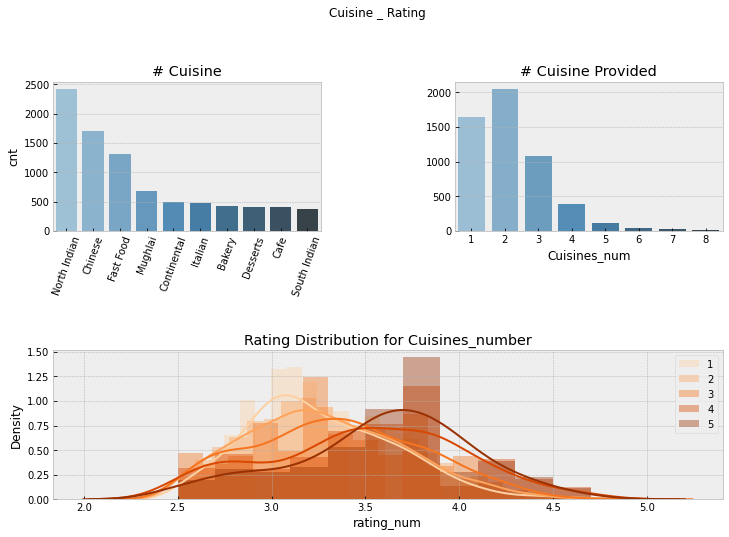

# Unique Cuisine:  84


In [ ]:
NCR['Cuisines'] = NCR['Cuisines'].astype(str)
NCR['Cuisines_num'] = NCR['Cuisines'].apply(lambda x: len(x.split(',')))

from collections import Counter
lst_cuisine = set()
Cnt_cuisine = Counter()
for cu_lst in NCR['Cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine[cu.strip()] += 1

cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
cnt.sort_values(0, ascending = False, inplace = True)


tmp_cnt = cnt.head(10)
tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)
with plt.style.context('bmh'):
    f = plt.figure(figsize = (12,8))
    ax = plt.subplot2grid((2,2), (0,0))
    sns.barplot(x = tmp_cnt.index, y = 'cnt', data = tmp_cnt, ax = ax, palette = sns.color_palette('Blues_d', 10))
    ax.set_title('# Cuisine')
    ax.tick_params(axis='x', rotation=70)
    ax = plt.subplot2grid((2,2), (0,1))
    sns.countplot(NCR['Cuisines_num'], ax=ax, palette = sns.color_palette('Blues_d', NCR.Cuisines_num.nunique()))
    ax.set_title('# Cuisine Provided')
    ax.set_ylabel('')

    ax = plt.subplot2grid((2,2), (1,0), colspan = 2)
    fusion_rate = NCR[['Cuisines_num', 'rating_cat', 'rating_num']].copy()
    fusion_rate.loc[fusion_rate['Cuisines_num'] > 5,'Cuisines_num'] = 5
    fusion_rate = fusion_rate.loc[fusion_rate.rating_cat != -1, :]
    pal = sns.color_palette('Oranges', 11)
    for i in range(1,6):
        num_ix = fusion_rate['Cuisines_num'] == i
        sns.distplot(fusion_rate.loc[num_ix, 'rating_num'], color = pal[i*2], label = str(i), ax = ax)
        ax.legend()
        ax.set_title('Rating Distribution for Cuisines_number')
        

    plt.subplots_adjust(wspace = 0.5, hspace = 0.8, top = 0.85)
    plt.suptitle('Cuisine _ Rating')
    plt.show()        
print('# Unique Cuisine: ', len(lst_cuisine))

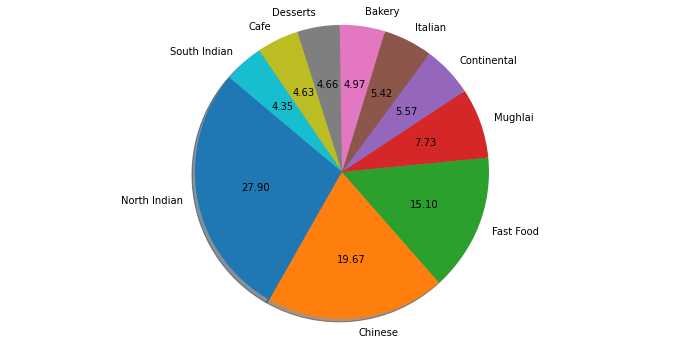

In [ ]:
plt.pie(tmp_cnt.cnt,labels=tmp_cnt.index,autopct='%.2f', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
south_asia = ['Afghani','Andhra','Awadhi', 'Bengali','Biryani',  'Burmese', 'Chettinad', 'Deli','Goan', 'Gujarati', 'Hyderabadi', 'Kashmiri','Kerala', 'Lebanese','Lucknowi', 'Maharashtrian','Mangalorean',
 'Mithai', 'Modern Indian', 'Moroccan', 'Mughlai','Naga', 'Nepalese', 'North Eastern', 'North Indian','Oriya', 'Parsi', 'Rajasthani','South Indian', 'Tex-Mex','Sri Lankan',
'Indian','Indonesian', 'Tibetan']
africa = ['African']
america = ['American','Mexican', 'South American']
europe = ['British', 'European', 'French','Italian', 'Mediterranean','Middle Eastern', 'Portuguese','Spanish', 'Continental']
west_asia = ['Arabian','Turkish','Iranian']
east_asia = ['Asian', 'Chinese','Japanese', 'Korean', 'Malaysian', 'Thai','Vietnamese',  'Sushi']
kind_food = set(['Bakery', 'Beverages','Burger','Cafe', 'Desserts','Drinks Only', 'Fast Food', 'Finger Food','Healthy Food', 'Ice Cream', 'Juices','Pizza','Raw Meats','Salad','Sandwich','Seafood','Street Food',
 'Tea'])
country = lst_cuisine - set(kind_food)

def kind_country_cu(lst, kind_food = kind_food, country = country):
    lst = lst.split(',')
    tmp1 = [var for var in lst if var in kind_food]
    tmp2 = [var for var in lst if var in country]
    if not tmp1: tmp1 = ['None']
    if not tmp2: tmp2 = ['None']
    return tmp1, tmp2
NCR['food_cu'], NCR['count_cu'] = zip(*NCR['Cuisines'].apply(kind_country_cu))

def get_popular(data):
    Cnt_cuisine = Counter()
    for cu_lst in data:
        for cu in cu_lst:
            if cu != 'None':
                Cnt_cuisine[cu.strip()] += 1
    cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
    cnt.sort_values(0, ascending = False, inplace = True)
    return cnt

In [ ]:
print(NCR['count_cu'].head(),NCR['food_cu'].head())


1161            [None]
1162    [North Indian]
1163    [North Indian]
1164    [South Indian]
1165            [None]
Name: count_cu, dtype: object 1161      [Cafe]
1162      [None]
1163      [None]
1164      [None]
1165    [Bakery]
Name: food_cu, dtype: object


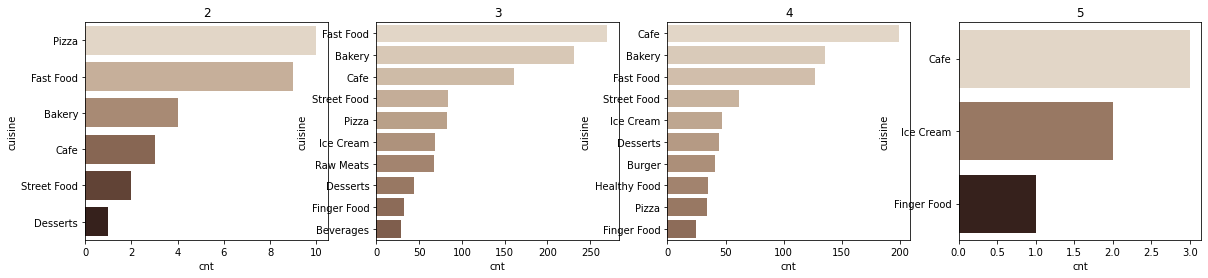

In [ ]:
rat_cu = NCR['food_cu'].groupby(NCR['rating_cat'])
tmp_cnt = {}
for i in [2,3,4,5]:
    data = rat_cu.get_group(i)
    tmp_cnt[i] = get_popular(data)

f, ax = plt.subplots(1,4, figsize = (20,4))
for i in [2,3,4,5]:
    tmp = tmp_cnt[i].reset_index()
    tmp.columns = ['cuisine', 'cnt']
    sns.barplot(y = 'cuisine', x = 'cnt', data = tmp.head(10), ax = ax[i-2], palette = sns.cubehelix_palette(n_colors = tmp.shape[0], start = 1, rot = 0.1))
    ax[i-2].set_title(str(i))
    #ax[i-2].tick_params('x', rotation = 90)
plt.show()

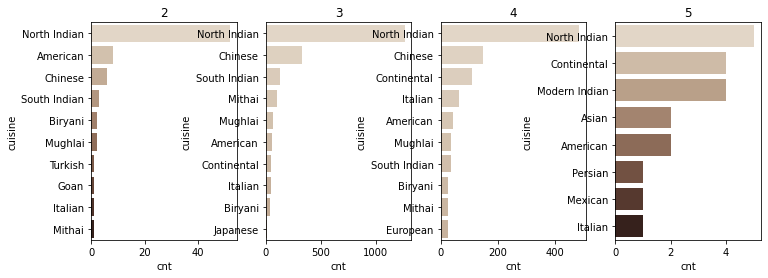

In [ ]:
rat_cu = NCR['count_cu'].groupby(NCR['rating_cat'])
tmp_cnt = {}
for i in [2,3,4,5]:
    data = rat_cu.get_group(i)
    tmp_cnt[i] = get_popular(data)

f, ax = plt.subplots(1,4, figsize = (12,4))
for i in [2,3,4,5]:
    tmp = tmp_cnt[i].reset_index()
    tmp.columns = ['cuisine', 'cnt']
    sns.barplot(y = 'cuisine', x = 'cnt', data = tmp.head(10), ax = ax[i-2], palette = sns.cubehelix_palette(n_colors = tmp.shape[0], start = 1, rot = 0.1))
    ax[i-2].set_title(str(i))
    #ax[i-2].tick_params('x', rotation = 90)
plt.show()

5. Price Range¶


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


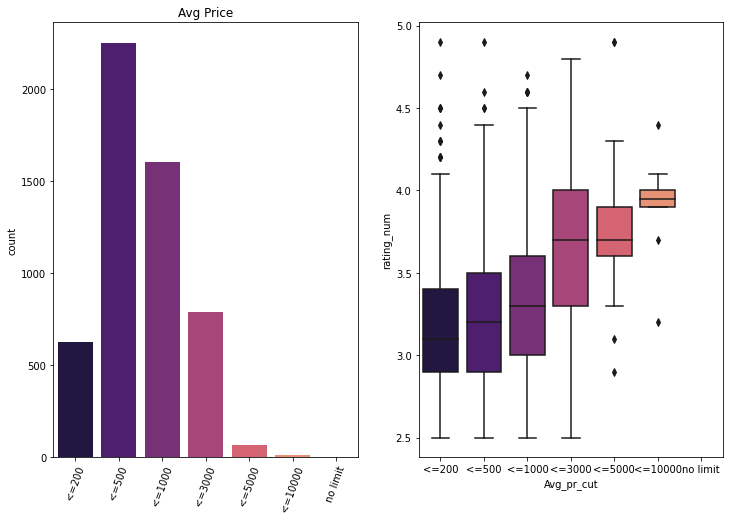

In [ ]:

f = plt.figure(figsize = (12,8))
NCR['Avg_pr_cut'] = pd.cut(NCR['Avg_cost_two'], bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000], labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'no limit'])
ax = plt.subplot2grid((1,2), (0,0))
sns.countplot(NCR['Avg_pr_cut'], ax = ax, palette = sns.color_palette('magma', 7))
ax.set_title('Avg Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((1,2), (0,1), colspan = 2)
sns.boxplot(x = 'Avg_pr_cut', y = 'rating_num', data = NCR, ax = ax, palette = sns.color_palette('magma', 7))


plt.show()

In [ ]:
Cities.head()


,index,City
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
